In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv('../data/profiles-v2.csv')
df = df[["H indice global",
         "H indice_I10 global",
         "Citations_global",
         "H indice depuis 2018",
         "H indice_I10 depuis 2018"]]
df

,H indice global,H indice_I10 global,Citations_global,H indice depuis 2018,H indice_I10 depuis 2018
0,37,69,5231,34,63
1,29,105,3973,22,66
2,28,46,3703,26,41
3,31,72,3549,26,60
4,32,65,3474,28,53
5,28,43,3362,16,23
6,29,52,3322,25,44
7,29,49,3213,22,43
8,25,46,3007,20,40
9,31,77,2963,25,58


In [6]:
import pandas as pd
num_rows, num_columns = df.shape
num_features = num_columns
print(f"Il y a {num_features} caractéristiques dans le DataFrame.")


Il y a 5 caractéristiques dans le DataFrame.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

print(df.head())


   H indice global  H indice_I10 global  Citations_global  \
0               37                   69              5231   
1               29                  105              3973   
2               28                   46              3703   
3               31                   72              3549   
4               32                   65              3474   

   H indice depuis 2018  H indice_I10 depuis 2018  
0                    34                        63  
1                    22                        66  
2                    26                        41  
3                    26                        60  
4                    28                        53  


In [28]:
# Sélectionner les caractéristiques pour l'analyse
features = df  # Exclure la première colonne qui pourrait être un identifiant ou une classe

# Standardiser les données pour s'assurer que toutes les variables sont sur la même échelle
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

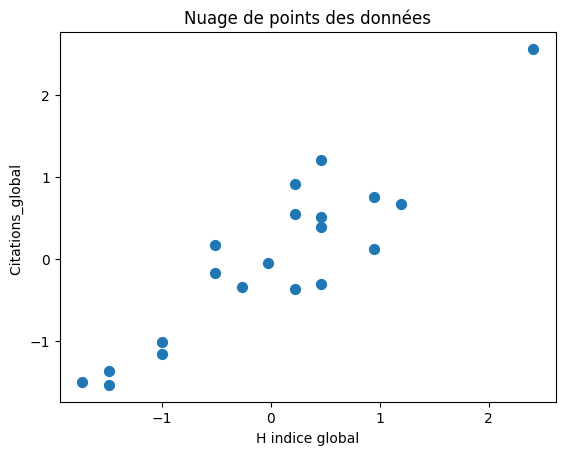

In [29]:
# Nuage de points
plt.scatter(features_scaled[:, 0], features_scaled[:, 2], s=50, cmap='viridis')
plt.title('Nuage de points des données')
plt.xlabel('H indice global')
plt.ylabel('Citations_global ')
plt.show()

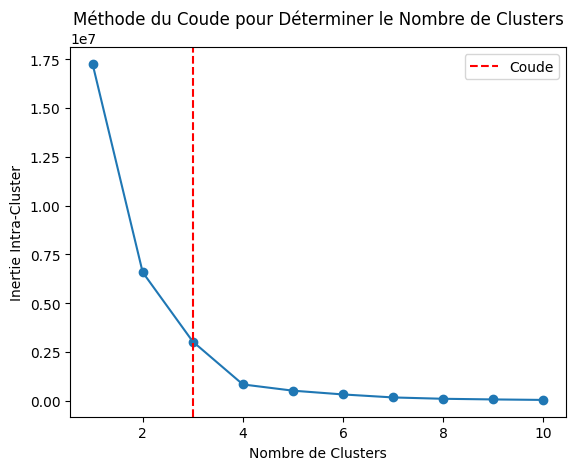

In [30]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Ignorer les avertissements liés à KMeans
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Appliquer KMeans avec un nombre de clusters variant de 1 à 10
inertia = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude avec une ligne pointillée au niveau du coude
plt.plot(possible_clusters, inertia, marker='o')
plt.title('Méthode du Coude pour Déterminer le Nombre de Clusters')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie Intra-Cluster')
plt.axvline(x=3, color='r', linestyle='--', label='Coude')
plt.legend()
plt.show()


elbow_index:  18


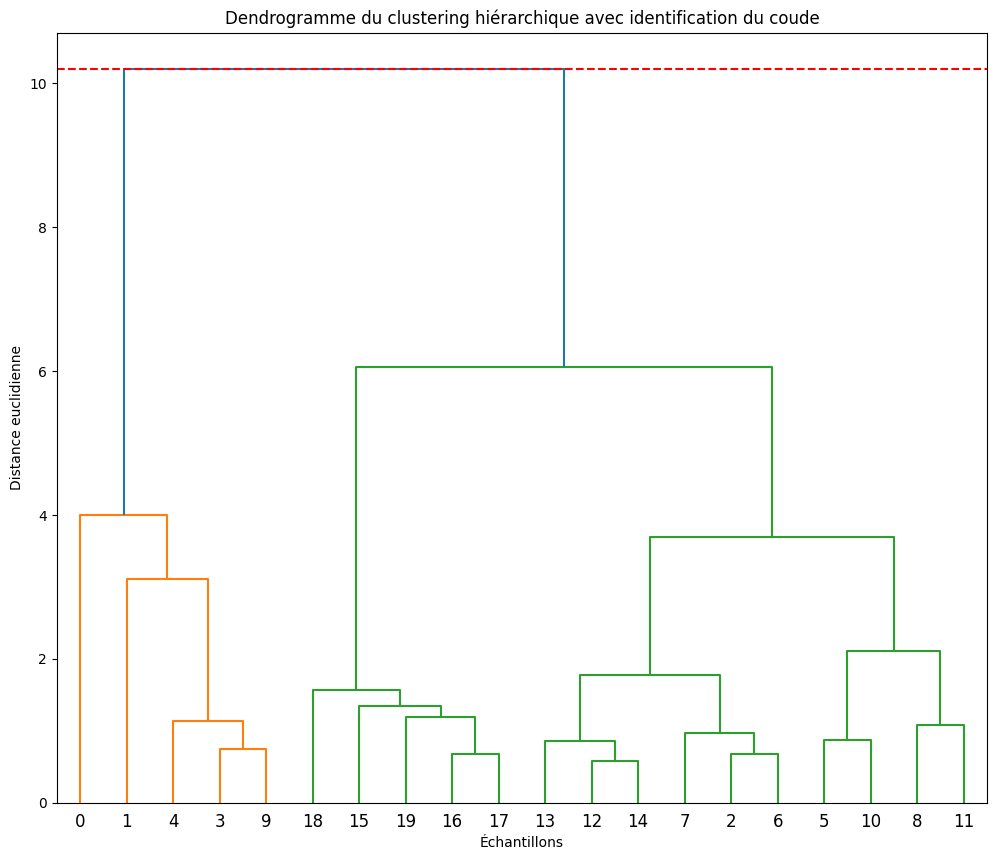

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(features_scaled, method='ward')  # Utiliser la liaison de Ward

# Utiliser la méthode du coude pour déterminer le nombre de clusters
distances = linkage_matrix[:, 2]
deltas = np.diff(distances, 2)
# Trouver l'indice du coude
elbow_index = np.argmax(deltas) + 2  # Ajouter 2 en raison de np.diff et du zéro initial
print("elbow_index: ", elbow_index)

# Tracer une ligne pointillée pour indiquer le coude
plt.figure(figsize=(12, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogramme du clustering hiérarchique avec identification du coude')
plt.xlabel('Échantillons')
plt.ylabel('Distance euclidienne')
plt.axhline(y=distances[elbow_index], color='r', linestyle='--', label='Coude')
plt.show()

# Utiliser la méthode du coude pour déterminer le nombre de clusters
n_clusters = elbow_index + 1  # +1 car les indices commencent à 1 dans fcluster

# Appliquer le clustering avec le nombre de clusters déterminé par la méthode du coude
cluster_labels = fcluster(linkage_matrix, t=distances[elbow_index], criterion='distance')
print(cluster_labels)

# Ajouter les étiquettes de cluster au DataFrame
df['Cluster'] = cluster_labels

# Afficher les premières lignes du DataFrame avec les étiquettes de cluster
# df.head(30)

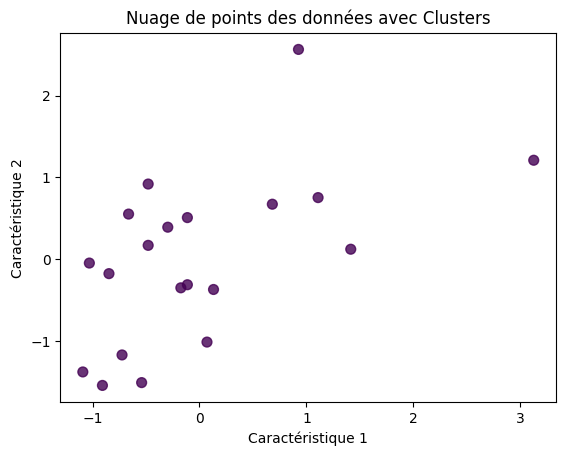

In [14]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.8)
plt.title('Nuage de points des données avec Clusters')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

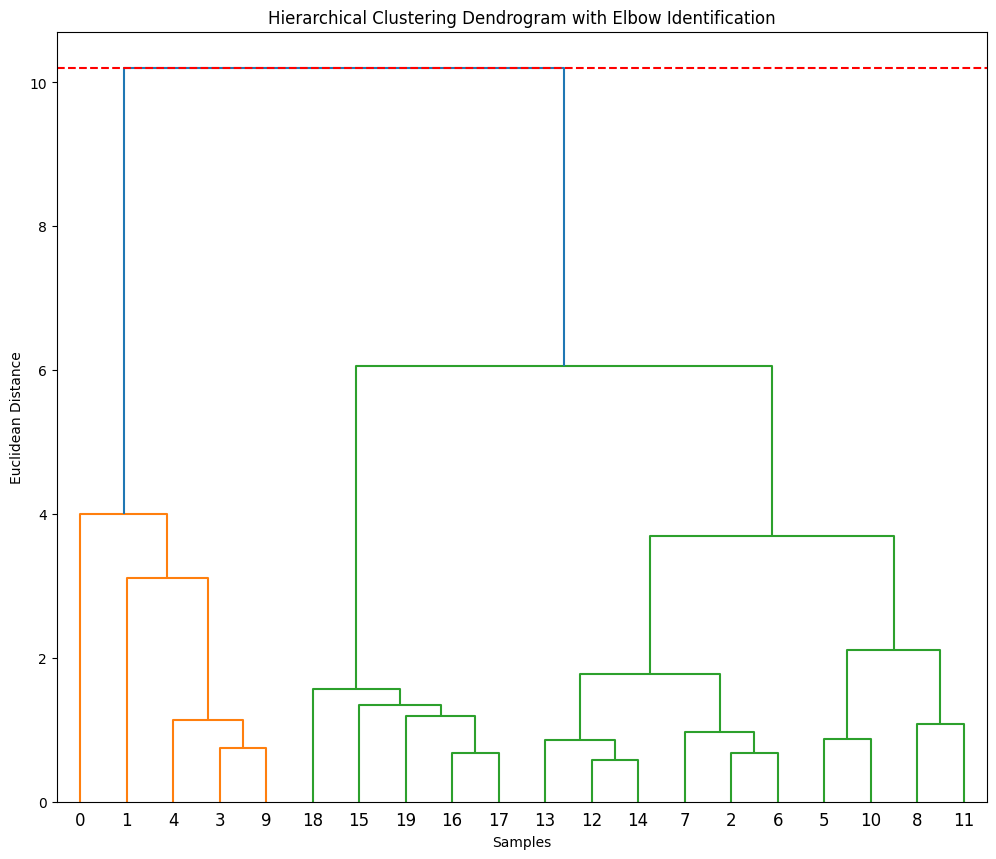

Selected Column: [ 2.5645235   1.20990032  0.91916244  0.75333416  0.67257364  0.55197126
  0.50889898  0.39152702  0.16970478  0.12232527 -0.04673342 -0.17595026
 -0.31162794 -0.34931618 -0.36977552 -1.01262928 -1.1698431  -1.37766685
 -1.50796049 -1.54241831]
Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

selected_column = features_scaled[:, 2]

# Assuming features_scaled is your dataset with scaled features
# features_scaled = ...

# Hierarchical Clustering
linkage_matrix = linkage(features_scaled, method='ward')

# Elbow Method to determine the number of clusters
distances = linkage_matrix[:, 2]
deltas = np.diff(distances, 2)
elbow_index = np.argmax(deltas) + 2  # Add 2 due to np.diff and the initial zero

# Plot dendrogram with the elbow point
plt.figure(figsize=(12, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram with Elbow Identification')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.axhline(y=distances[elbow_index], color='r', linestyle='--', label='Elbow')
plt.show()

# Number of clusters
n_clusters = elbow_index + 1

# Apply clustering with the determined number of clusters
cluster_labels = fcluster(linkage_matrix, t=distances[elbow_index], criterion='distance')

# Add cluster labels to the DataFrame or array
# df['Cluster'] = cluster_labels

# Print the selected column and cluster labels
print("Selected Column:", selected_column)
print("Cluster Labels:", cluster_labels)
